#  Práctica 1. Regresión Lineal y Polinomial
Andrea Benítez Pineda

Usaremos el siguiente dataset de datos de peces. Hay un total de 159 filas (muestras de entrenamiento) y 7 columnas en el conjunto de datos. 

Los detalles de cada columna son los siguientes

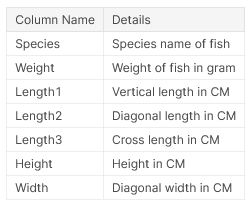

* Las variables independientes son "Especie", "Longitud1", "Longitud2", "Longitud3", "Altura" y "Anchura".
* La variable dependiente es "Peso".

Tenemos que estimar el peso del pez basándonos en sus valores de medición.

## Importamos las librerias requeridas para la práctica.


In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd 


# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl




## Carga de conjunto de datos

In [2]:
#import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/fishes.csv'
df = pd.read_csv(url)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


⭕ Práctica

Construye un modelo de Regresión Lineal (Polinomial) para predecir el peso de un pez en función de las variables predictoras.

**Preprocesamiento**

* Cambia el nombre de las columnas por nombres relacionados con su interpretación.
* Verifica si hay valores faltantes
* Verifica la correlación entre variables usando el método [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) del dataframe. Considera eliminar las variables con correlación para evitar la colinearidad.
* Verifica si hay datos faltantes o invalidos.
* Explora la relación entre pares de variables usando [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de seaborn.
* Considera usar PolinomialFeatures en función de tus observaciones del punto anterior.
* Considera la codificación one-hot para la(s) variable(s) categórica(s).

**Regresión Lineal**
Entrena un modelo de RL separando una parte para entrenamiento y reporta la métrica de rendimiento r2score y [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Considera varios modelos para mejorar tus métricas.

##Preprocesamiento

*  **Cambia el nombre de las columnas por nombres relacionados con su interpretación.**

In [3]:
df.columns=[ "Especie", "Peso", "Longitud1", "Longitud2", "Longitud3", "Altura" , "Anchura"]
df

,Especie,Peso,Longitud1,Longitud2,Longitud3,Altura,Anchura
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


*  **Verifica si hay valores faltantes.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Especie    159 non-null    object 
 1   Peso       159 non-null    float64
 2   Longitud1  159 non-null    float64
 3   Longitud2  159 non-null    float64
 4   Longitud3  159 non-null    float64
 5   Altura     159 non-null    float64
 6   Anchura    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.isna().sum()

Especie      0
Peso         0
Longitud1    0
Longitud2    0
Longitud3    0
Altura       0
Anchura      0
dtype: int64

No se encuentran datos faltantes.

* **Verifica la correlación entre variables usando el método corr() del dataframe. Considera eliminar las variables con correlación para evitar la colinearidad.**

Para visualizar la correlación entre las variables independientes y la dependiente, utilizamos un mapa de calor con un azul más fuerte que indica una correlación más alta.

<ipython-input-6-e60de1b5a21f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_corr = df.corr()


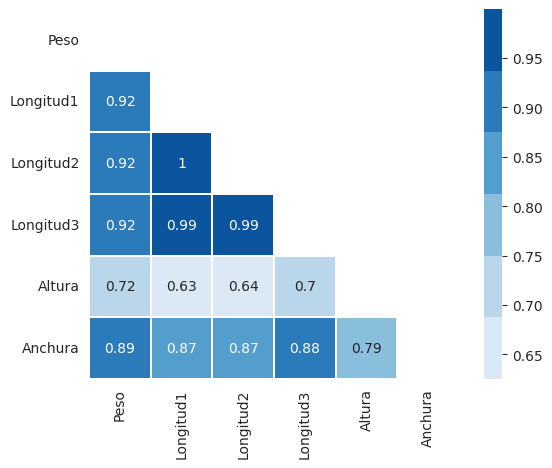

In [6]:
"""
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
"""

my_corr = df.corr()
mask = np.zeros_like(my_corr) 
## Esta parte es para llenar la diagonal superior de espacios en blanco!
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
     ax = sns.heatmap(my_corr, mask=mask, square=True, cmap=sns.color_palette('Blues'), vmax=np.max(np.sort(my_corr.values)[:,-2]), linewidths=0.3,annot=True)




* **Verifica si hay datos faltantes o inválidos.**

In [7]:
df.sort_values("Peso")

,Especie,Peso,Longitud1,Longitud2,Longitud3,Altura,Anchura
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
...,...,...,...,...,...,...,...
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440


Observamos que hay un pez con peso=0, pero que si tiene registrados los otros datos, por lo que se considera como un dato inválido y procederemos a eliminarlo del dataframe

In [8]:
#Cambiamos el dato por nan
df.loc[df['Peso'] == 0, 'Peso'] = np.nan

In [9]:
#Verificamos
df.isnull().sum()

Especie      0
Peso         1
Longitud1    0
Longitud2    0
Longitud3    0
Altura       0
Anchura      0
dtype: int64

In [10]:
#Eliminamos el dato
df = df.dropna(axis=0)
     

In [11]:
#df sin datos faltantes o inválidos
df.isnull().sum()

Especie      0
Peso         0
Longitud1    0
Longitud2    0
Longitud3    0
Altura       0
Anchura      0
dtype: int64

* **Explora la relación entre pares de variables usando pairplot de seaborn.**

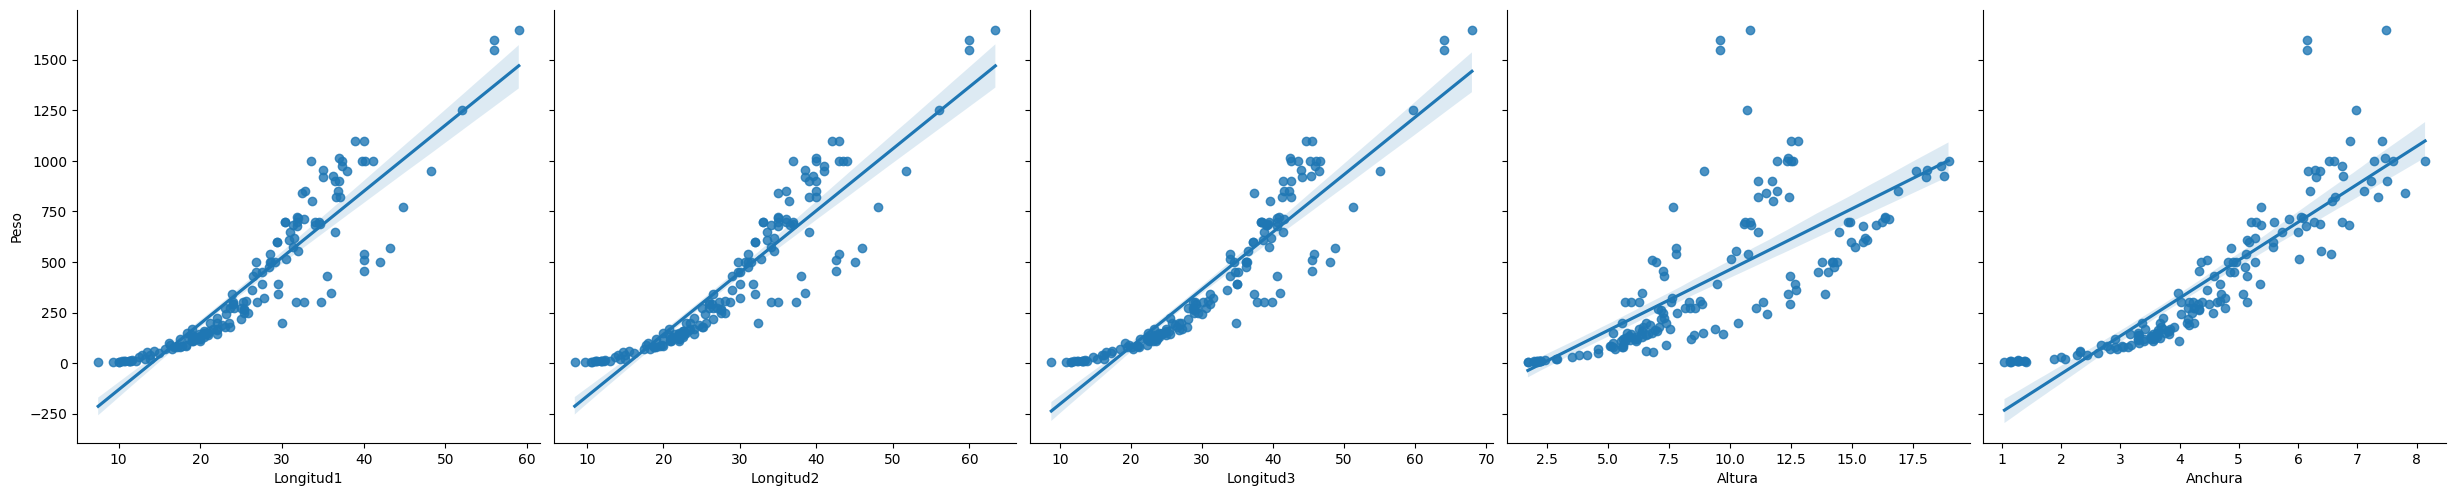

In [12]:
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""


sns.pairplot(df, x_vars=["Longitud1", "Longitud2", "Longitud3", "Altura" , "Anchura"], y_vars=['Peso'], height=5, aspect=1, kind='reg')
plt.show()

De los datos obtenidos con el método corr() y de las observaciones de la relación entre pares se considera no incluir la columna Altura en el análisis, ya que es la que tiene menor correclación con la variable dependiente Peso.

* **Considera usar PolinomialFeatures en función de tus observaciones del punto anterior.**

In [13]:
y=df['Peso']
y.shape

(158,)

In [14]:
df.drop(columns=['Peso', 'Altura'],inplace=True)



<ipython-input-14-3e055bf5391e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Peso', 'Altura'],inplace=True)


In [15]:
df

,Especie,Longitud1,Longitud2,Longitud3,Anchura
0,Bream,23.2,25.4,30.0,4.0200
1,Bream,24.0,26.3,31.2,4.3056
2,Bream,23.9,26.5,31.1,4.6961
3,Bream,26.3,29.0,33.5,4.4555
4,Bream,26.5,29.0,34.0,5.1340
...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,1.3936
155,Smelt,11.7,12.4,13.5,1.2690
156,Smelt,12.1,13.0,13.8,1.2558
157,Smelt,13.2,14.3,15.2,2.0672


* **Considera la codificación one-hot para la(s) variable(s) categórica(s).**

Inspeccionemos las *features* que contienen datos no numéricos (Especie).

In [16]:
columns_object = df.select_dtypes('object').columns.to_list()
len(columns_object),columns_object

(1, ['Especie'])

Hagamos un conteo de los valores únicos en cada una de las *features* categóricas

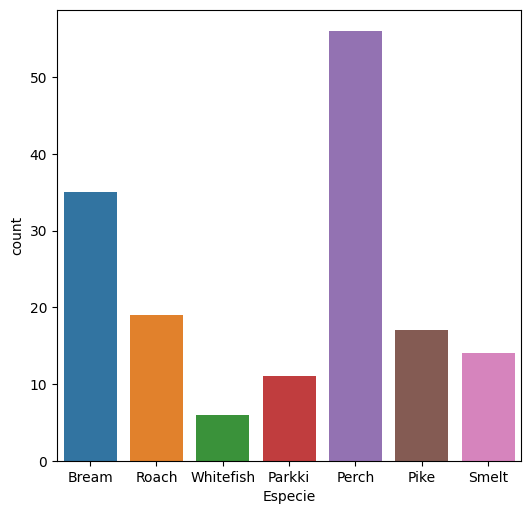

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig = plt.figure(figsize=(15,15))
for idx,col_name in enumerate(columns_object):
    plt.subplot(3,3,idx+1)
    sns.countplot(x=df.loc[:,col_name])
plt.tight_layout()
plt.show()

Hacemos la codificación one-hot para las variable **Especie**.

In [18]:
x = pd.get_dummies(df)
x


,Longitud1,Longitud2,Longitud3,Anchura,Especie_Bream,Especie_Parkki,Especie_Perch,Especie_Pike,Especie_Roach,Especie_Smelt,Especie_Whitefish
0,23.2,25.4,30.0,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.0672,0,0,0,0,0,1,0


## Entrenamiento

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75, random_state=4595) 

print(f"Entrenamiento: {x.shape,y.shape}")
print(f"Prueba: {x_test.shape,y_test.shape}")

Entrenamiento: ((158, 11), (158,))
Prueba: ((40, 11), (40,))


## Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pl = Pipeline([('scl',MinMaxScaler()),
    ('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',LinearRegression())])
"""
pl = Pipeline([
    ('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',LinearRegression())])   
"""         

"\npl = Pipeline([\n    ('pf',PolynomialFeatures(degree=2,include_bias=False)),\n               ('lr',LinearRegression())])   \n"

In [34]:
pl.fit(x_train,y_train)

Pipeline(steps=[('scl', MinMaxScaler()),
                ('pf', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [35]:
b0 = pl['lr'].intercept_
b1 = pl['lr'].coef_[0]
b2 = pl['lr'].coef_[1]
print(b0,b1,b2)

-66.56100536281775 -112242573630217.19 1766.078125


## Predicciones

Veamos las predicciones en el conjunto de entrenamiento.

In [36]:
y_pred_train = pl.predict(x_train)


In [37]:
print(f"Valores de prueba:\n{y_train[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_train[:5],2)}")

Valores de prueba:
108    320.0
103    260.0
31     955.0
136    540.0
93     145.0
Name: Peso, dtype: float64
Valores predichos:
[352.57 257.82 917.7  554.1  144.2 ]


Comparemos las predicciones y los valores reales

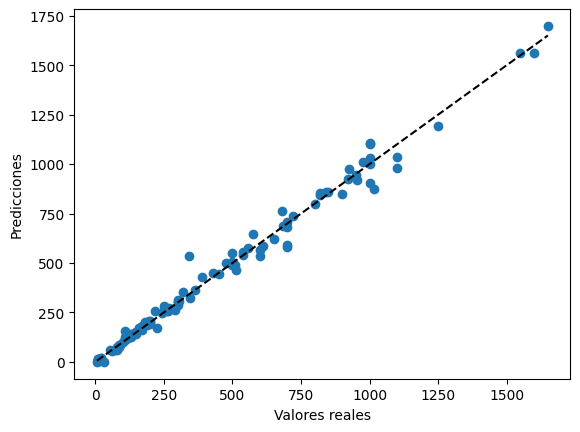

In [38]:
xaxis = np.linspace(np.min(y_train),np.max(y_train),200)
plt.figure()
plt.scatter(y_train, y_pred_train, label='Valores predichos')
plt.ylabel("Predicciones")
plt.xlabel("Valores reales")
plt.plot(xaxis,xaxis,'k--')
plt.show()

Veamos las predicciones en el conjunto de prueba.

In [39]:
y_pred_test = pl.predict(x_test)


In [40]:
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test[:5],2)}")

Valores de prueba:
22     620.0
113    700.0
75      51.5
54     390.0
138    567.0
Name: Peso, dtype: float64
Valores predichos:
[655.53 701.6   13.56 488.76 655.91]


Comparamos usando los valores de entrenamiento.

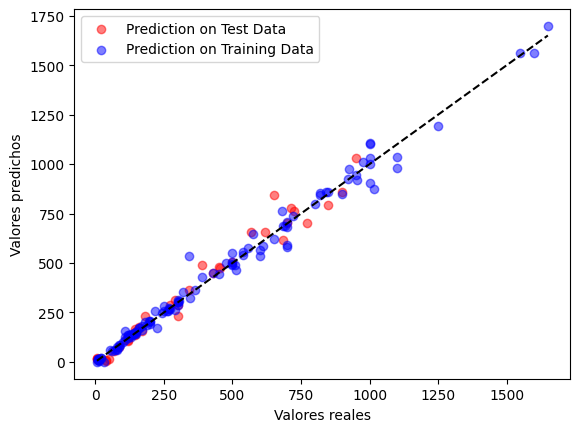

In [41]:
xaxis = np.linspace(np.min(y),np.max(y),100)

plt.figure(dpi=100)
plt.scatter(y_test, y_pred_test, c='red',alpha=0.5)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.5)
plt.plot(xaxis,xaxis,'k--')
plt.legend(['Prediction on Test Data', 'Prediction on Training Data'])
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

* **Reporta la métrica de rendimiento r2score y MSE.**

Evaluamos el score.

In [42]:

print(f"Entrenamiento: {pl.score(x_train,y_train)}")
print(f"Prueba: {pl.score(x_test,y_test)}")#R2score



Entrenamiento: 0.9884391875300735
Prueba: 0.9685276015848441


In [43]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
#Promedio del error absoluto y cuadrático medio
#print(mean_absolute_error(y_test,y_pred))
print(f" MSE: {mean_squared_error(y_test,y_pred_test)}")

 MSE: 2512.223519788119


### Interpretación de los resultados

Coeficientes de la regresión. Vemos que hay un coeficiente por cada feature. 

In [44]:
#pl['lr'].intercept_ #regresion lineal intercepto
print(pl['lr'].coef_.shape) #regresion lineal coeficientes
print(pl['lr'].coef_)

(77,)
[-1.12242574e+14  1.76607812e+03  4.45898047e+03  1.10326562e+03
 -3.87480469e+02  1.99218750e+01  2.82812500e+01  6.48314453e+02
 -3.09218750e+01  8.24394531e+01 -3.27333984e+02  3.54071922e+05
 -7.76658656e+05  8.31681328e+04 -5.33300000e+03  1.12242574e+14
  1.12242574e+14  1.12242574e+14  1.12242574e+14  1.12242574e+14
  1.12242574e+14  1.12242574e+14  3.16919891e+05  1.53565656e+05
 -5.60156250e+00 -1.79227031e+04 -1.01318906e+04 -3.29825000e+03
 -7.15949219e+03 -4.95125000e+03  3.76731250e+03  4.14797812e+04
 -1.18884078e+05 -7.02506250e+03  1.68629531e+04  5.90925781e+02
  2.88714844e+02 -5.72083203e+03  2.61590625e+03 -2.84125000e+03
 -7.32557812e+03  4.11245312e+03  1.23869141e+02  1.64633789e+02
 -7.94773438e+02  3.50408594e+03 -3.07308594e+02 -5.27945312e+02
 -1.04689648e+03 -3.87667480e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.91210938e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0

Veamos cuales variables tienen más peso.

In [45]:
columns = x.columns.to_list()
coefs_dict = dict(zip(columns,pl['lr'].coef_))
dict(sorted(coefs_dict.items(),key=lambda x:x[1],reverse=True))


{'Longitud3': 4458.98046875,
 'Longitud2': 1766.078125,
 'Anchura': 1103.265625,
 'Especie_Pike': 648.314453125,
 'Especie_Smelt': 82.439453125,
 'Especie_Perch': 28.28125,
 'Especie_Parkki': 19.921875,
 'Especie_Roach': -30.921875,
 'Especie_Whitefish': -327.333984375,
 'Especie_Bream': -387.48046875,
 'Longitud1': -112242573630217.19}

## Comparación de resultados

**Polinomio grado=2** \

Incluyendo la variable **Altura** los resultados obtenidos, train 0.75:

\begin{array}{|c|c|} \hline
 & Entrenamiento & Prueba & MSE \\ \hline
S/escalador & 0.9924750423 & 0.9648310661 & 2807.2923 \\ \hline
StandarScaler & 0.9924750743& 0.9648444292 & 2806.2256 \\\hline
MinMax & 0.9924749634 & 0.9648210685 & 2808.0903 \\ \hline
\end{array}


Sin la variable **Altura**, train 0.75:

\begin{array}{|c|c|} \hline
 & Entrenamiento & Prueba & MSE \\ \hline
S/escalador & 0.9884385613 & 0.9685067289 & 2807.2923 \\ \hline
StandarScaler & 0.9884377618 & 0.9684418531 & 2513.8896 \\\hline
MinMax & 0.9884391875 & 0.9685276015 & 2512.2235 \\ \hline
\end{array}





De los resultados el módelo (train 0.75) con mejor precisión de la predicción lo obtenemos, no incluyendo la variable **Altura** y utilizando el scalador **MinMax**.
\begin{array}{|c|c|} \hline
  Variable & Peso \\ \hline
  Longitud3 & 4458.98046875 \\ 
 Longitud2 &1766.078125\\
 Anchura&1103.265625\\
 Especie_ Pike&648.314453125\\
 Especie_Smelt&82.439453125\\
 Especie_Perch&28.28125\\
 Especie_Parkki&19.921875\\
 Especie_Roach&-30.921875\\
 Especie_Whitefish& -327.333984375\\
 Especie_Bream&-387.48046875\\
 Longitud1&-112242573630217.1\\
 \end{array}